In [1]:
from utils import *
from MySolution import MyClassifier, MyClustering, MyLabelSelection, MyFeatureSelection

%load_ext autoreload
%autoreload 2

Synthetic data shape:  (1000, 2) (1000,)
Unique labels:  [0. 1. 2.]


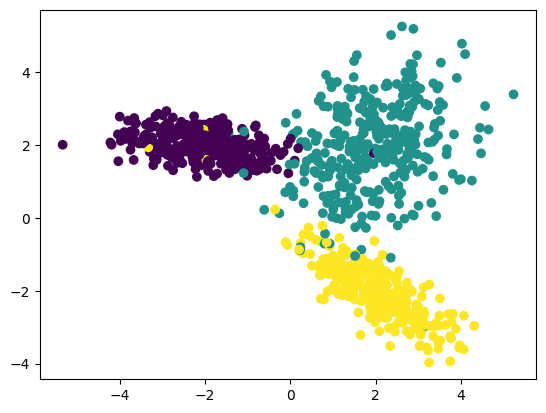

In [4]:
# Get datasets
syn_data = prepare_synthetic_data()
print("Synthetic data shape: ", syn_data['trainX'].shape, syn_data['trainY'].shape)

uniqueLabel = np.unique(syn_data['trainY'])
print("Unique labels: ", uniqueLabel)

plt.scatter(syn_data['trainX'][:, 0], syn_data['trainX'][:, 1], c=syn_data['trainY'])

MNIST data shape:  (1000, 784) (1000,)


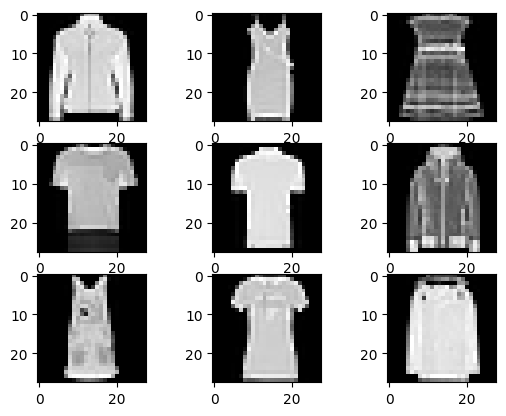

In [115]:
mnist_data = prepare_mnist_data()
print("MNIST data shape: ", mnist_data['trainX'].shape, mnist_data['trainY'].shape)

for i in range(9):	
    plt.subplot(330 + 1 + i)
    plt.imshow(mnist_data['trainX'][i].reshape(28,28), cmap='gray')
plt.show()

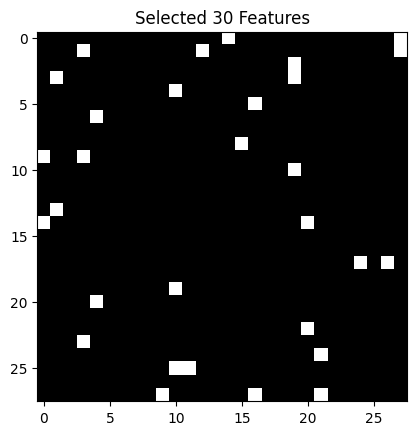

In [2]:
import numpy as np

data = prepare_mnist_data()

# randomly choose 30 features
np.random.seed(0)
selected_features = np.random.choice(data['trainX'].shape[1], 30, replace=False)
data['trainX'] = data['trainX'][:, selected_features]
data['testX'] = data['testX'][:, selected_features]

visualize_features(selected_features)

In [5]:
## TODO: Implement your solution and store the results in the following dictionaries
## Please note that the below values are given as an example to show the format, 
## you need to replace them with your values :)

# Task 1
result1 = {'synthetic_test_accuracy':None, 'mnist_test_accuracy':None}
K = len(np.unique(syn_data['trainY']))
synClassifier = MyClassifier(K)
print(f"synthetic has {K} classes")
synClassifier.train(syn_data['trainX'], syn_data['trainY'])
result1['synthetic_test_accuracy'] = synClassifier.evaluate(syn_data['testX'], syn_data['testY'])
result1['synthetic_train_accuracy'] = synClassifier.evaluate(syn_data['trainX'], syn_data['trainY'])

# normalize mnist data
mnist_data['trainX'] = mnist_data['trainX'] / 255
mnist_data['testX'] = mnist_data['testX'] / 255

# Unpack mnist data
trainX, trainY, testX, testY = mnist_data['trainX'], mnist_data['trainY'], mnist_data['testX'], mnist_data['testY']
K = len(np.unique(trainY))
mnistClassifier = MyClassifier(K)
print(f"mnist has {K} classes")
mnistClassifier.train(trainX, trainY)
result1['mnist_test_accuracy'] = mnistClassifier.evaluate(testX, testY)
result1['mnist_train_accuracy'] = mnistClassifier.evaluate(trainX, trainY)


# plot_result(result1 = result1)

# # Task 2
# result2 = {'synthetic':{'K':[3, 5, 10], 'clustering_nmi':[0.6,0.6,0.6], 'classification_accuracy':[0.8,0.8,0.8]},
#             'mnist':{'K':[3, 10, 32], 'clustering_nmi':[0.5,0.5,0.5], 'classification_accuracy':[0.7,0.7,0.7]}}

# # Task 3
# # only include the plots for the option of task 3 you chosen in the report                    
# result3_1 = {'synthetic': {'label_percentage':[0.05,0.1,0.2,0.5,1], 'test_accuracy(our algo)':[0.5,0.6,0.7,0.8,0.9], 'test_accuracy(random)':[0.4,0.5,0.6,0.7,0.8]},
#             'mnist': {'label_percentage':[0.05,0.1,0.2,0.5,1], 'test_accuracy(our algo)':[0.5,0.5,0.7,0.7,0.7], 'test_accuracy(random)':[0.4,0.4,0.6,0.6,0.6]}}

# result3_2 = {'feature_number':[5, 20, 80, 320, 784], 'classifier_accuracy(our algo)':[0.5,0.5,0.7,0.7,0.7], 'classifier_accuracy(random)':[0.4,0.4,0.6,0.6,0.6], 
#                                                 'clustering_accuracy(our algo)':[0.35,0.35,0.45,0.55,0.6], 'clustering_accuracy(random)':[0.3,0.3,0.4,0.5,0.6], 
#                                                 'nmi(our algo)':[0.35,0.4,0.45,0.5,0.5], 'nmi(random)':[0.3,0.35,0.4,0.5,0.5]}


# plot_result(result1 = result1, result2 = result2, result3_1 = result3_1)

# Alternatively
# plot_result(result1 = result1, result2 = result2, result3_2 = result3_2)

synthetic has 3 classes
mnist has 3 classes


In [109]:
print(result1)

{'synthetic_test_accuracy': 0.972, 'mnist_test_accuracy': 0.912, 'synthetic_train_accuracy': 0.966, 'mnist_train_accuracy': 1.0}


### Without L1 Regularization

In [118]:
print(result1)

{'synthetic_test_accuracy': 0.972, 'mnist_test_accuracy': 0.724, 'synthetic_train_accuracy': 0.966, 'mnist_train_accuracy': 1.0}


### With L1 Regularization

In [112]:
print(result1)

{'synthetic_test_accuracy': 0.972, 'mnist_test_accuracy': 0.912, 'synthetic_train_accuracy': 0.966, 'mnist_train_accuracy': 1.0}


# Task 2

In [7]:
def plot_synthetic_data(X, y):
    plt.figure(figsize=(8,6))
    unique_labels = np.unique(y)
    colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels)))
    
    for label, color in zip(unique_labels, colors):
        mask = y == label
        plt.scatter(X[mask, 0], X[mask, 1], c=[color], label=f'Class {label}')
    
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2') 
    plt.title('Synthetic Data Visualization')
    plt.legend()
    plt.show()

In [3]:
# # Task 2
result2 = {'synthetic':{'K':[3, 5, 10], 'clustering_nmi':[0.6,0.6,0.6], 'classification_accuracy':[0.8,0.8,0.8]},
            'mnist':{'K':[3, 10, 32], 'clustering_nmi':[0.5,0.5,0.5], 'classification_accuracy':[0.7,0.7,0.7]}}

Converged at iteration 6


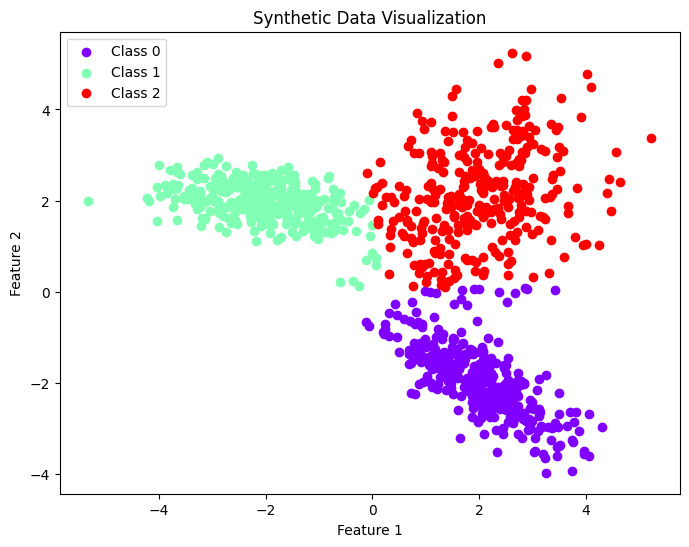

Converged at iteration 21


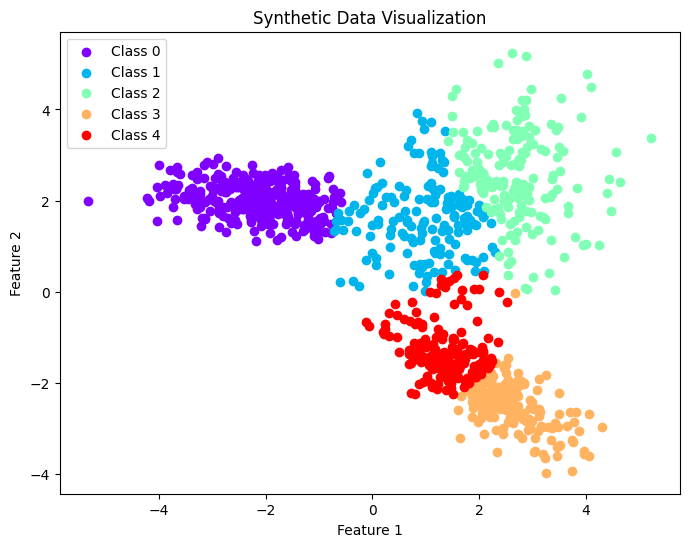

Converged at iteration 23


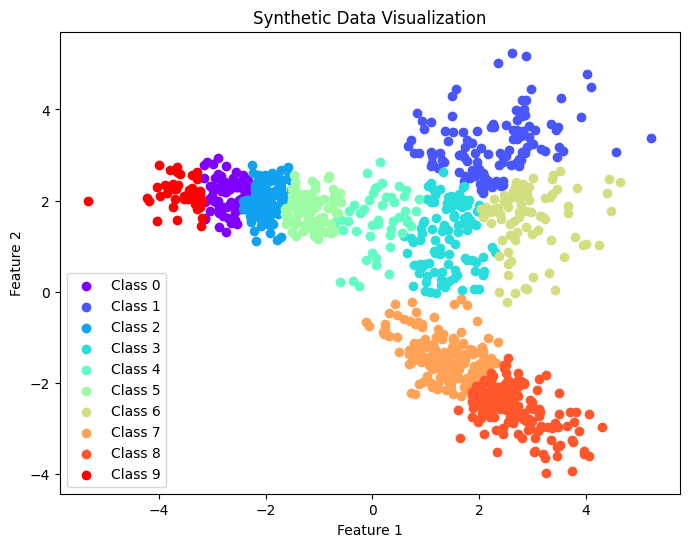

Converged at iteration 11
Converged at iteration 24
Converged at iteration 35


In [8]:
syn_data = prepare_synthetic_data()
trainX, trainY, testX, testY = syn_data['trainX'], syn_data['trainY'], syn_data['testX'], syn_data['testY']

for i in range(3):
    k = result2['synthetic']['K'][i]
    synClustering = MyClustering(k)
    synClustering.train(trainX)
    result2['synthetic']['clustering_nmi'][i] = synClustering.evaluate_clustering(trainY)
    result2['synthetic']['classification_accuracy'][i] = synClustering.evaluate_classification(trainY, testX, testY)
    plot_synthetic_data(X=trainX, y=synClustering.labels)


mnist_data = prepare_mnist_data()
trainX, trainY, testX, testY = mnist_data['trainX'], mnist_data['trainY'], mnist_data['testX'], mnist_data['testY']
for i in range(3):
    k = result2['mnist']['K'][i]
    mnistClustering = MyClustering(k)
    mnistClustering.train(trainX)
    result2['mnist']['clustering_nmi'][i] = mnistClustering.evaluate_clustering(trainY)
    result2['mnist']['classification_accuracy'][i] = mnistClustering.evaluate_classification(trainY, testX, testY)


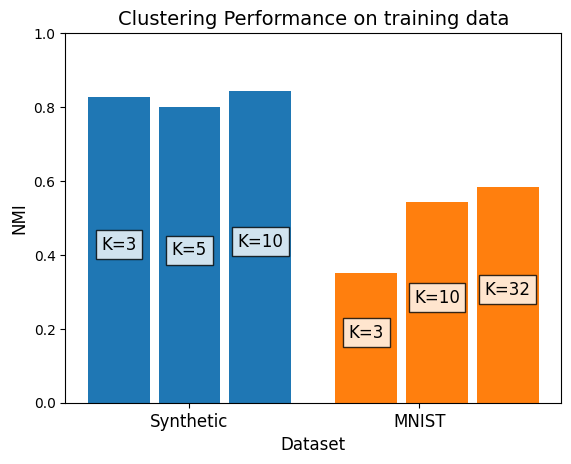

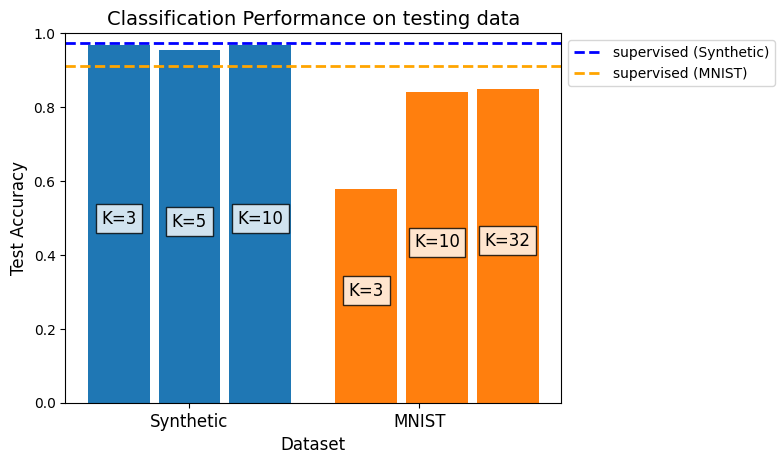

In [9]:
plot_result(result1 = result1, result2 = result2)

In [ ]:
def plot_synthetic_data(X, y):
    plt.figure(figsize=(8,6))
    unique_labels = np.unique(y)
    colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels)))
    
    for label, color in zip(unique_labels, colors):
        mask = y == label
        plt.scatter(X[mask, 0], X[mask, 1], c=[color], label=f'Class {label}')
    
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2') 
    plt.title('Synthetic Data Visualization')
    plt.legend()
    plt.show()

